<a href="https://colab.research.google.com/github/betulsahan/python/blob/main/opencv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

OpenCV ile Görüntü İşleme Dersleri

# Giriş

In [1]:
# Gerekli kütüphanelerin import edilmesi
import cv2
import numpy as np
import time
import os


In [4]:
# Görüntüyü BGR formatında okur (OpenCV'nin varsayılan formatı)
img = cv2.imread('ornek.jpg')

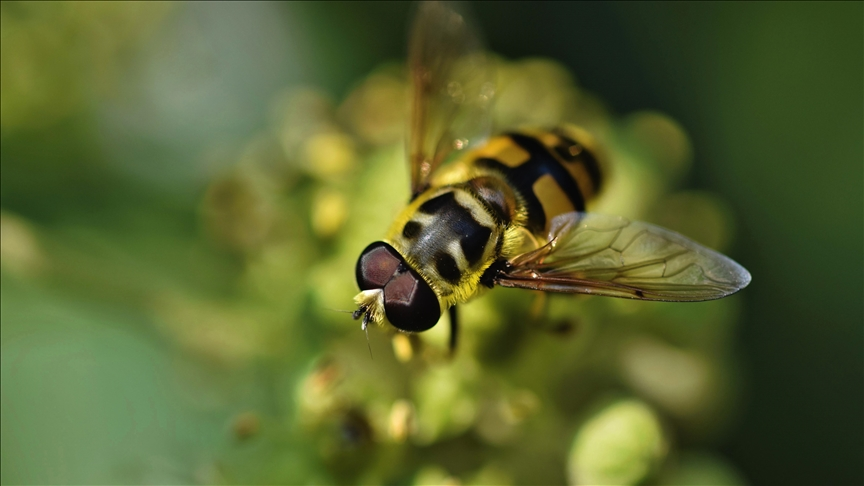

In [5]:
from google.colab.patches import cv2_imshow
# Görüntüyü Colab'de göstermek için cv2_imshow kullanılır
cv2_imshow(img)

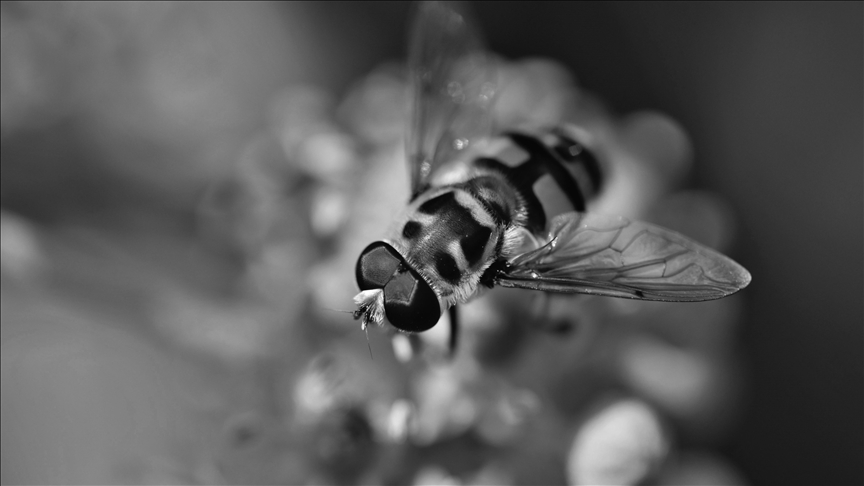

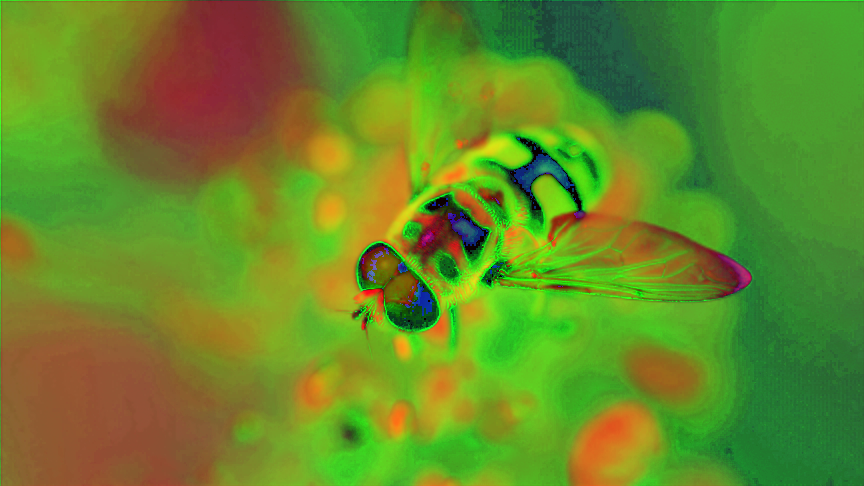

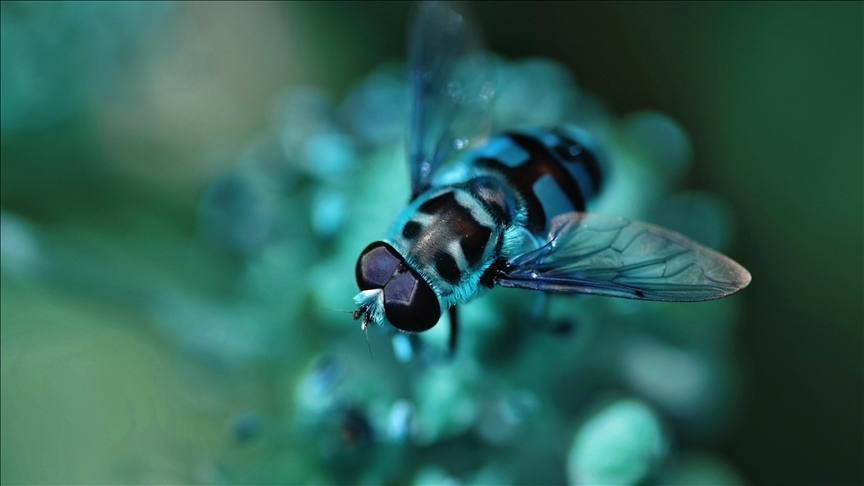

In [8]:
from google.colab.patches import cv2_imshow
# Renk Uzayları: BGR - GRAY - HSV - RGB

#BGR: OpenCV'nin varsayılan renk düzeni (Blue, Green, Red)
#RGB: İnsan gözüne daha doğal gelen sıralama
#GRAY: Gri tonlama (siyah-beyaz)
#HSV: Ton, Doygunluk, Parlaklık – renk algılamada çok kullanışlı

#renk uzayları arası dönüşüm
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

cv2_imshow(gray)
cv2_imshow(hsv)
cv2_imshow(rgb)

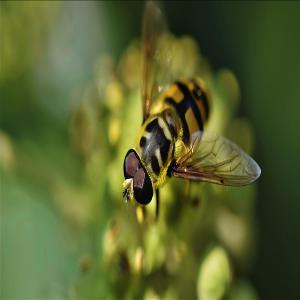

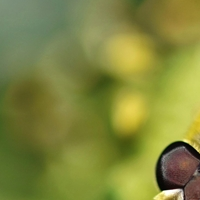

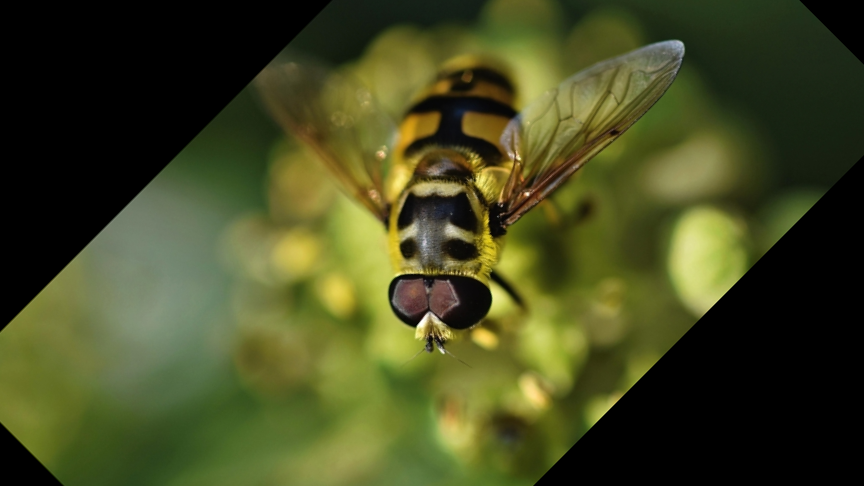

In [9]:
from google.colab.patches import cv2_imshow
# Yeniden boyutlandırma
resized = cv2.resize(img, (300, 300)) #(fx,fy) yatay ve dikey ölçekleme oranı
cv2_imshow(resized)

# Kesme
cropped = img[100:300, 200:400] #[y1:y2, x1:x2]
cv2_imshow(cropped)

# Döndürme
(h, w) = img.shape[:2]
center = (w // 2, h // 2)
rotated = cv2.warpAffine(img, cv2.getRotationMatrix2D(center, 45, 1.0), (w, h))
#cv2.warpAffine(img, cv2.getRotationMatrix2D(center, angle, scale)
cv2_imshow(rotated)


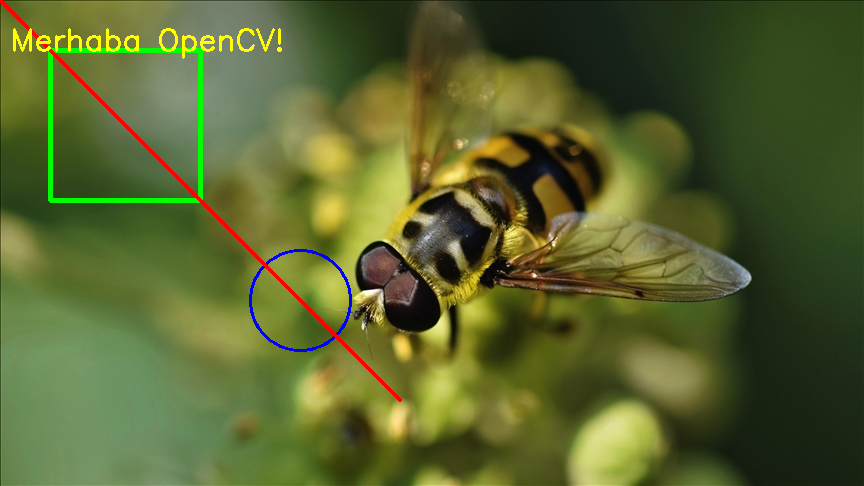

In [10]:
from google.colab.patches import cv2_imshow
# Kopyasını al
canvas = img.copy()

# Dikdörtgen çiz
cv2.rectangle(canvas, (50, 50), (200, 200), (0, 255, 0), 3) #img, sol üst köşe, sağ alt köşe, renk(BGR), kalınlık

# Çember çiz
cv2.circle(canvas, (300, 300), 50, (255, 0, 0), 2) #img, merkez, yarıçap, renk(BGR), kalınlık

# Çizgi çiz
cv2.line(canvas, (0, 0), (400, 400), (0, 0, 255), 2) #img, konum1, konum2, renk(BGR), kalınlık

# Yazı yaz
cv2.putText(canvas, 'Merhaba OpenCV!', (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,255), 2) #img, yazı, başlangıç koordinatı, yazı tipi, büyüklük, renk(BGR), kalınlık

#klaınlık değeri -1 girilirse cismin içi doldurulur.

cv2_imshow(canvas)


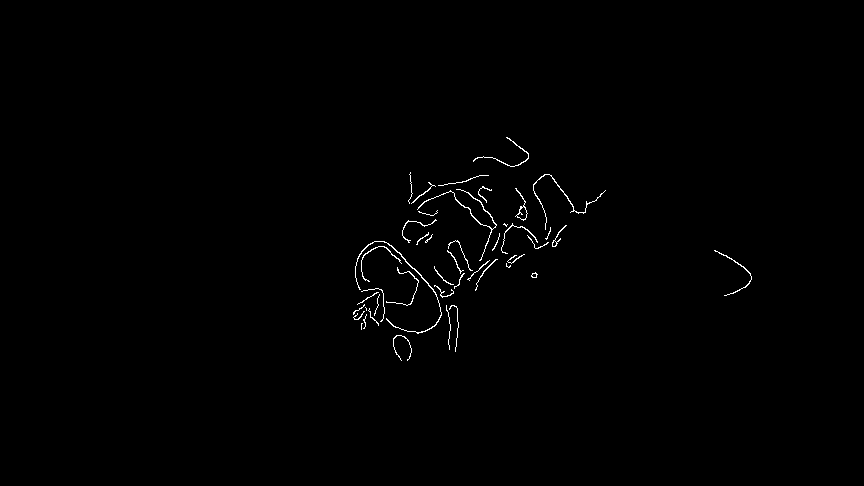

In [11]:
from google.colab.patches import cv2_imshow
# Bulanıklaştırma
blur = cv2.GaussianBlur(gray, (7, 7), 0) #giriş görüntüsü, kernel boyutu, standart sapma

# Canny Kenar Algılama
edges = cv2.Canny(blur, 100, 200) #giriş görüntüsü, eşik değeri1 , eşik değeri2

cv2_imshow(edges)


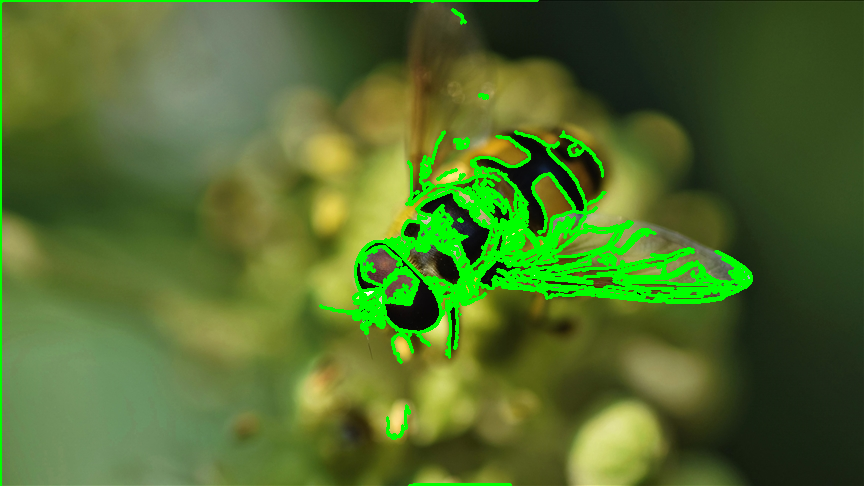

In [12]:
from google.colab.patches import cv2_imshow
# Kenarları bul
edges = cv2.Canny(gray, 50, 150)

# Kontur bulma
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) #img, bulma metodu, yakalama yöntemi

# Kontur çizme
img_copy = img.copy()
cv2.drawContours(img_copy, contours, -1, (0, 255, 0), 2) #img, bulduğum konturlerin listesi
                                                         #hangi konturler çizilecek (-1 ise hepsi)
cv2_imshow(img_copy)


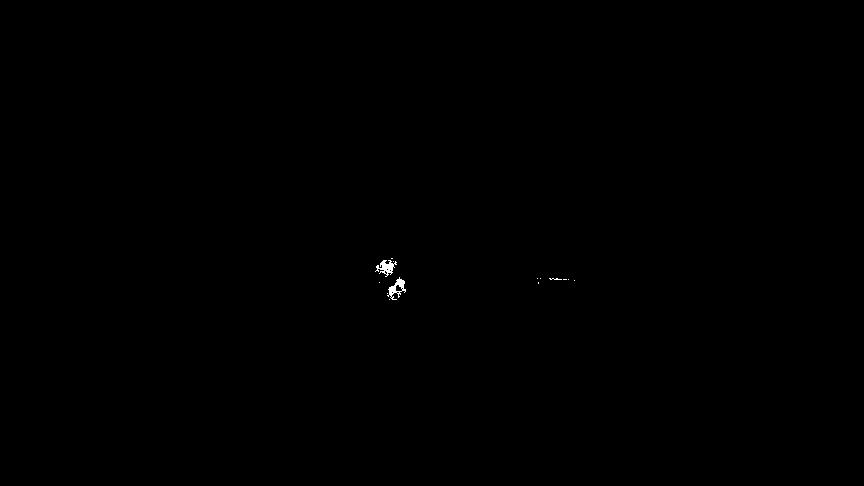

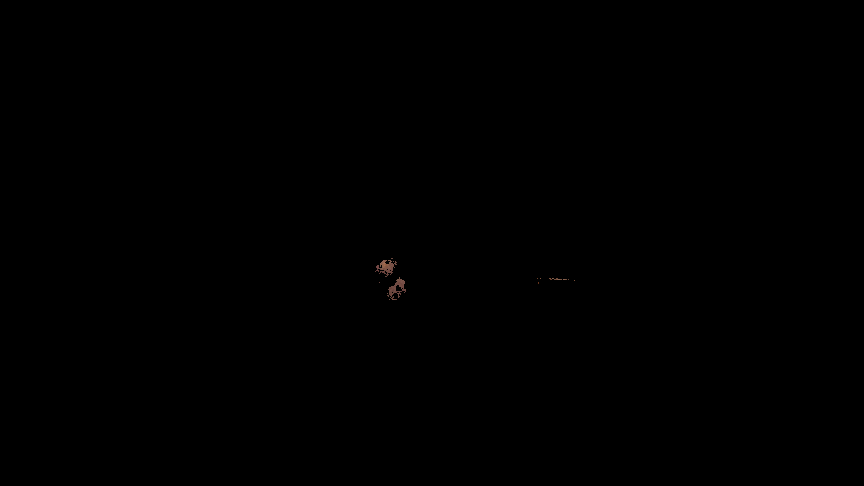

In [13]:
from google.colab.patches import cv2_imshow
# Renk Algılama (HSV ile)

# Renk aralığı seç
lower_red = np.array([0, 100, 100])
upper_red = np.array([10, 255, 255])

# HSV'ye dönüştür
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
# Belirli renge göre maske oluştur
mask = cv2.inRange(hsv, lower_red, upper_red)
# Maskeyi orijinal görüntüyle birleştir
result = cv2.bitwise_and(img, img, mask=mask)

cv2_imshow(mask)
cv2_imshow(result)


In [ ]:
# Kamera Kullanımı

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break
    cv2.imshow("Kamera", frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()




# Hough Dönüşümü

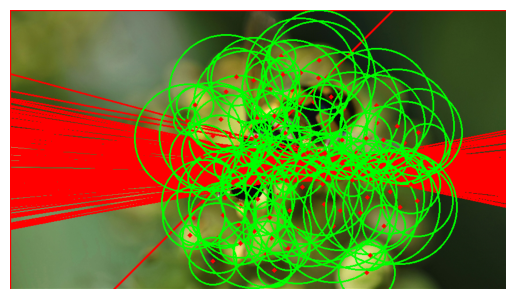

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Görüntüyü gri tona çevir
img = cv2.imread('ornek.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Kenarları bul (Canny ile)
edges = cv2.Canny(gray, 50, 150)

# Doğruları bulmak için Hough Dönüşümü
rho = 1             # çözünürlük (piksel)
theta = np.pi / 180 # açı çözünürlüğü (radyan)
threshold = 100     # minimum kesişim sayısı (güven seviyesi)

lines = cv2.HoughLines(edges, rho, theta, threshold)

# Doğruları çiz
if lines is not None:
    for line in lines:
        rho, theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))
        cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)

# Çemberleri bulmak için HoughCircles
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, dp=1.2, minDist=30,
                           param1=50, param2=30, minRadius=10, maxRadius=100)

# Çemberleri çiz
if circles is not None:
    circles = np.uint16(np.around(circles))
    for (x, y, r) in circles[0, :]:
        cv2.circle(img, (x, y), r, (0, 255, 0), 2)
        cv2.circle(img, (x, y), 2, (0, 0, 255), 3)

# Görüntüyü göster
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
